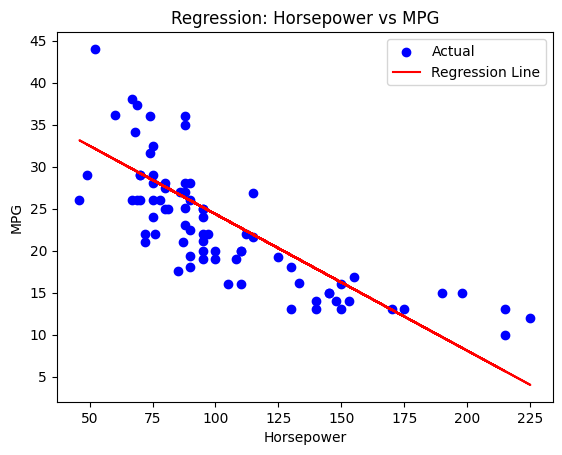

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

# Download the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv"
data = pd.read_csv(url)

# Prepare the dataset
data = data.dropna()  # Drop rows with missing values
X = data[['horsepower']].values  # Feature

y = data['mpg'].values  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run the regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Plot the scatter plot with the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Regression: Horsepower vs MPG')
plt.legend()
plt.show()

In [6]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


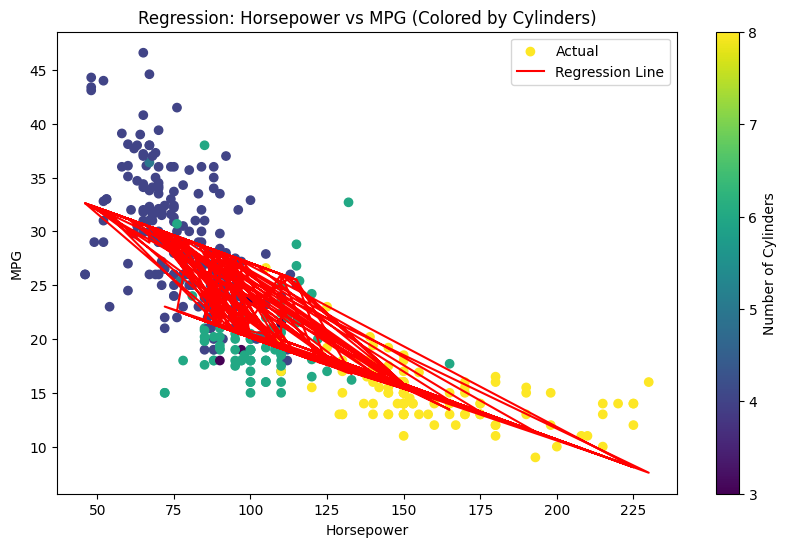

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Prepare the data with cylinders as a categorical variable
X_cylinders = data[['horsepower', 'cylinders']]

# Define a pipeline with one-hot encoding for the 'cylinders' column
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['cylinders'])
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
pipeline.fit(X_cylinders, y)

# Predict using the model
y_pred_cylinders = pipeline.predict(X_cylinders)

# Plot the scatter plot with regression line and color by cylinders
cylinders = data['cylinders']
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['horsepower'], y, c=cylinders, cmap='viridis', label='Actual')
plt.plot(data['horsepower'], y_pred_cylinders, color='red', label='Regression Line')
plt.colorbar(scatter, label='Number of Cylinders')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Regression: Horsepower vs MPG (Colored by Cylinders)')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     184.1
Date:                Tue, 06 May 2025   Prob (F-statistic):          7.55e-100
Time:                        20:13:05   Log-Likelihood:                -1122.2
No. Observations:                 392   AIC:                             2256.
Df Residuals:                     386   BIC:                             2280.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.7761      2.41

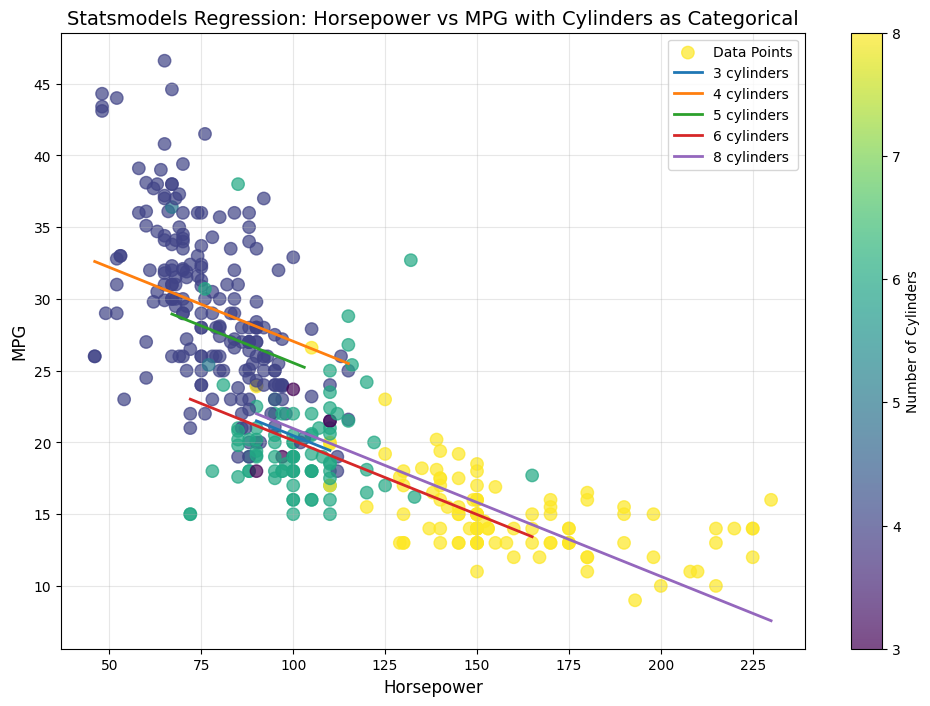

R-squared: 0.7046
Adjusted R-squared: 0.7008


In [13]:
# Implementing regression using statsmodels with cylinders as a categorical variable
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Create a DataFrame for statsmodels with cylinders as a categorical variable
df_sm = data.copy()
df_sm['cylinders'] = df_sm['cylinders'].astype('category')

# Using formula API for easier handling of categorical variables
model_sm = smf.ols('mpg ~ horsepower + C(cylinders)', data=df_sm).fit()

# Print the model summary
print(model_sm.summary())

# Calculate predictions
y_pred_sm = model_sm.predict(df_sm)

# Plot the scatter plot with the regression line and color by cylinders
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_sm['horsepower'], df_sm['mpg'], 
                     c=df_sm['cylinders'].astype('int'), 
                     cmap='viridis', 
                     alpha=0.7,
                     s=80,
                     label='Data Points')

# Sort data by horsepower for a smoother line plot
sorted_data = df_sm.sort_values('horsepower')
sorted_data['predicted'] = model_sm.predict(sorted_data)

# Plot regression lines for each cylinder group
for cyl in sorted(df_sm['cylinders'].unique()):
    cyl_data = sorted_data[sorted_data['cylinders'] == cyl]
    plt.plot(cyl_data['horsepower'], cyl_data['predicted'], 
             linewidth=2, label=f'{cyl} cylinders')

plt.colorbar(scatter, label='Number of Cylinders')
plt.xlabel('Horsepower', fontsize=12)
plt.ylabel('MPG', fontsize=12)
plt.title('Statsmodels Regression: Horsepower vs MPG with Cylinders as Categorical', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Calculate R-squared
print(f"R-squared: {model_sm.rsquared:.4f}")
print(f"Adjusted R-squared: {model_sm.rsquared_adj:.4f}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     194.6
Date:                Tue, 06 May 2025   Prob (F-statistic):           5.45e-83
Time:                        20:07:40   Log-Likelihood:                -895.49
No. Observations:                 313   AIC:                             1801.
Df Residuals:                     308   BIC:                             1820.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.4211      2.734     16.982      0.0

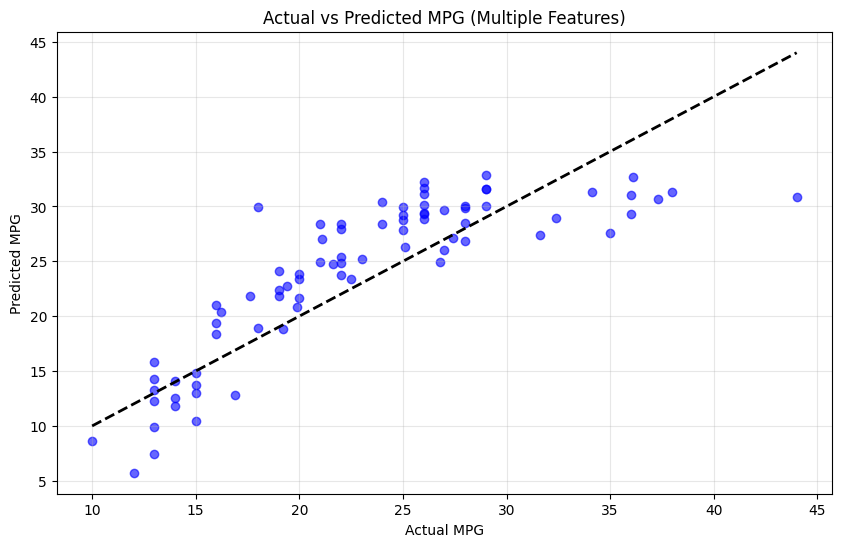

In [ ]:
# Multiple feature regression using statsmodels
# Using all data without train/test split

# Select multiple features for the regression
X_multi = data[['horsepower', 'weight', 'displacement', 'acceleration']]

# Add a constant (intercept) to the model
X_multi_sm = sm.add_constant(X_multi)

# Fit the OLS model with multiple features
model_multi_sm = sm.OLS(y, X_multi_sm).fit()

# Print the model summary
print(model_multi_sm.summary())

# Calculate predictions
y_multi_pred_sm = model_multi_sm.predict(X_multi_sm)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_multi_pred_sm, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG (Multiple Features)')
plt.grid(True, alpha=0.3)
plt.show()

# Calculate R-squared
print(f"R-squared: {model_multi_sm.rsquared:.4f}")
print(f"Adjusted R-squared: {model_multi_sm.rsquared_adj:.4f}")

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     162.0
Date:                Tue, 06 May 2025   Prob (F-statistic):          4.67e-102
Time:                        20:08:38   Log-Likelihood:                -1114.3
No. Observations:                 392   AIC:                             2243.
Df Residuals:                     385   BIC:                             2270.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            39.1417      3.16

<Figure size 1200x800 with 0 Axes>

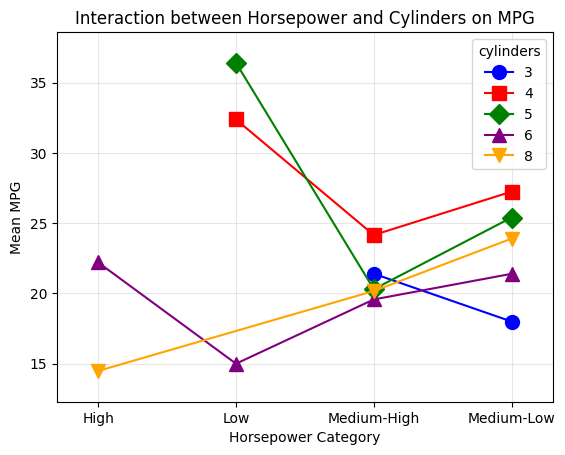

In [11]:
# Implement categorical variables using statsmodels' formula API
import statsmodels.formula.api as smf

# Create a DataFrame with cylinders as a categorical variable
df_for_formula = data[['mpg', 'horsepower', 'cylinders', 'acceleration']].copy()
df_for_formula['cylinders'] = df_for_formula['cylinders'].astype('category')

# Create a model using formula notation - this automatically handles categorical variables
model_formula = smf.ols('mpg ~ horsepower + C(cylinders) + acceleration', data=df_for_formula).fit()

# Print the model summary
print(model_formula.summary())

# Plot the effects of cylinders on mpg
from statsmodels.graphics.factorplots import interaction_plot

# Create binned horsepower for better visualization

df_for_formula['hp_binned'] = pd.qcut(df_for_formula['horsepower'], 4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Ensure both hp_binned and cylinders are categorical
df_for_formula['hp_binned'] = df_for_formula['hp_binned'].astype(str)
df_for_formula['cylinders'] = df_for_formula['cylinders'].astype(str)

plt.figure(figsize=(12, 8))
interaction_plot(
    df_for_formula['hp_binned'], 
    df_for_formula['cylinders'], 
    df_for_formula['mpg'],
    colors=['blue', 'red', 'green', 'purple', 'orange'],
    markers=['o', 's', 'D', '^', 'v'],
    ms=10
)
plt.title('Interaction between Horsepower and Cylinders on MPG')
plt.xlabel('Horsepower Category')
plt.ylabel('Mean MPG')
plt.grid(True, alpha=0.3)
plt.show()